In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

In [4]:
df=pd.read_csv(r'C:\Users\hp\OneDrive\Documents\Hair_Tracker_AI\Datasets_All\Hair_Fall\hair_loss.csv')

X=df.drop(['hair_fall','body_water_content','stress_level','liver_data'],axis=1)
y=df['hair_fall']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df.head()
X.head()

,total_protein,total_keratine,hair_texture,vitamin,manganese,iron,calcium
0,312,100,14,249,87,55,333
1,52,207,3,425,387,1,182
2,170,197,11,140,199,91,414
3,256,334,19,358,120,3,35
4,309,185,58,207,329,301,345


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [8]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:53:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.1698641877637131

Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.15      0.16      5092
           1       0.17      0.17      0.17      5025
           2       0.17      0.18      0.18      4993
           3       0.18      0.17      0.17      5162
           4       0.17      0.17      0.17      5077
           5       0.17      0.18      0.17      4987

    accuracy                           0.17     30336
   macro avg       0.17      0.17      0.17     30336
weighted avg       0.17      0.17      0.17     30336



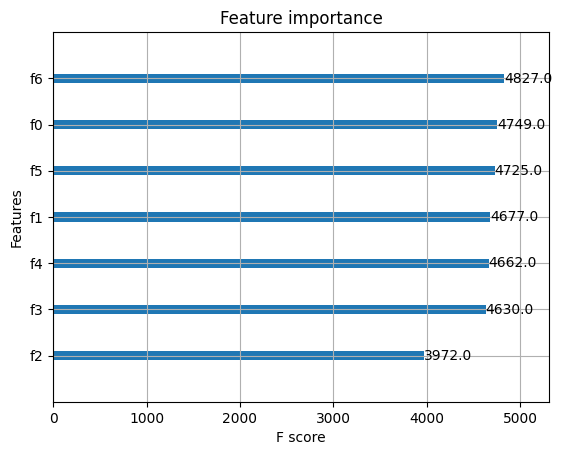

In [10]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
plot_importance(model_xgb)
plt.show()

In [11]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'colsample_bytree': [0.3, 0.7]
}
random_search = RandomizedSearchCV(XGBClassifier(), param_distributions=param_grid, cv=5, n_iter=10, random_state=42)
random_search.fit(X_train, y_train)
print(random_search.best_params_)

{'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.7}


In [ ]:
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

In [13]:
y_pred = best_model.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.16      0.16      0.16      5092
           1       0.16      0.18      0.17      5025
           2       0.16      0.23      0.19      4993
           3       0.17      0.12      0.14      5162
           4       0.16      0.14      0.15      5077
           5       0.16      0.16      0.16      4987

    accuracy                           0.16     30336
   macro avg       0.16      0.16      0.16     30336
weighted avg       0.16      0.16      0.16     30336



In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.1628428270042194


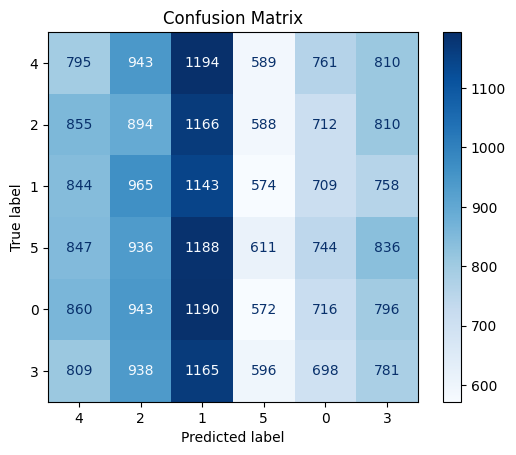

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = y_test.unique()
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()